<a href="https://colab.research.google.com/github/Zimi1214/Final-Project/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import load_model


seed = 4353

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_fake='https://drive.google.com/open?id=1sTzWwA8JCiBKH9u364c-kezhMnTiHsvI'
fluff, id1 = link_fake.split('=')
print (id1) # Verify that you have everything after '='

1sTzWwA8JCiBKH9u364c-kezhMnTiHsvI


In [0]:
link_true='https://drive.google.com/open?id=1fhYamoD4zvINmJF33sxhaMz7ynpmpsN9'
fluff, id2 = link_true.split('=')
print (id2) # Verify that you have everything after '='

1fhYamoD4zvINmJF33sxhaMz7ynpmpsN9


In [0]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('Fake.csv')
downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('True.csv')

In [0]:
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [0]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [0]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [0]:
df_fake.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [0]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [0]:
df_fake['text']=df_fake['title'].astype(str)+df_fake['text'].astype(str)
df_fake['type']=0
df_fake.drop(columns=['title','date'],inplace=True)

In [0]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [0]:
df_true['text']=df_true['title'].astype(str)+df_true['text'].astype(str)
df_true['type']=1
df_true.drop(columns=['title','date'],inplace=True)

In [0]:
df_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [0]:
df=pd.concat([df_fake,df_true])
df.head()

,text,subject,type
0,Donald Trump Sends Out Embarrassing New Year’...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,0
4,Pope Francis Just Called Out Donald Trump Dur...,News,0


In [0]:
df.tail()

,text,subject,type
21412,'Fully committed' NATO backs new U.S. approach...,worldnews,1
21413,LexisNexis withdrew two products from Chinese ...,worldnews,1
21414,Minsk cultural hub becomes haven from authorit...,worldnews,1
21415,Vatican upbeat on possibility of Pope Francis ...,worldnews,1
21416,Indonesia to buy $1.14 billion worth of Russia...,worldnews,1


In [0]:
df.describe(include='all')

,text,subject,type
count,44898,44898,44898.000000
unique,39105,8,NaN
top,Highlights: The Trump presidency on April 13 a...,politicsNews,NaN
freq,8,11272,NaN
mean,NaN,NaN,0.477015
std,NaN,NaN,0.499477
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,1.000000


In [0]:
df['type'].value_counts()

0    23481
1    21417
Name: type, dtype: int64

In [0]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   subject  44898 non-null  object
 2   type     44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [0]:
df.iloc[0,0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is DisturbingDonald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this d

In [0]:
porter = PorterStemmer()
stop_words = stopwords.words('english')

for i in np.arange(0,44898):
    text_tokens = word_tokenize(df.iloc[i,0])
    text_tokens = [w.lower() for w in text_tokens]
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens_without_sw]
    words = [word for word in stripped if word.isalpha()]
    stemmed = [porter.stem(word) for word in words]
    join_back = (" ").join(stemmed)
    df.iloc[i,0] = join_back

In [0]:
df.iloc[0,0]

'donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb tweet went welll expectwhat kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df.to_csv('clean.csv')
!cp clean.csv "drive/My Drive/Data Science"

In [0]:
link_clean='https://drive.google.com/open?id=1pC7daDCEmdINGjTqDMEl60QZucLPc290'
fluff, id3 = link_clean.split('=')
print (id3) # Verify that you have everything after '='

1pC7daDCEmdINGjTqDMEl60QZucLPc290


In [0]:
downloaded = drive.CreateFile({'id':id3}) 
downloaded.GetContentFile('clean.csv')

AttributeError: ignored

In [0]:
df=pd.read_csv('/content/drive/My Drive/Data Science/clean.csv')
df

,Unnamed: 0,text,subject,type
0,0,donald trump send embarrass new year eve messa...,News,0
1,1,drunk brag trump staffer start russian collu i...,News,0
2,2,sheriff david clark becom internet joke threat...,News,0
3,3,trump obsess even obama name code websit imag ...,News,0
4,4,pope franci call donald trump christma speechp...,News,0
...,...,...,...,...
44893,21412,fulli commit nato back new us approach afghani...,worldnews,1
44894,21413,lexisnexi withdrew two product chine marketlon...,worldnews,1
44895,21414,minsk cultur hub becom authoritiesminsk reuter...,worldnews,1
44896,21415,vatican upbeat possibl pope franci visit russi...,worldnews,1


In [0]:
# Word extraction from true and fake texts

true_text = df[df.type==1]['text']
true_text = true_text.reset_index().drop(['index'], axis=1)
fake_words = df[df.type==0]['text']
fake_words = fake_words.reset_index().drop(['index'], axis=1)

In [0]:
def plot_wordcloud(text_d):
    wordcloud = WordCloud(background_color = 'black',
                         max_words = 3000,
                         width=1600,
                         height=800).generate(text_d)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

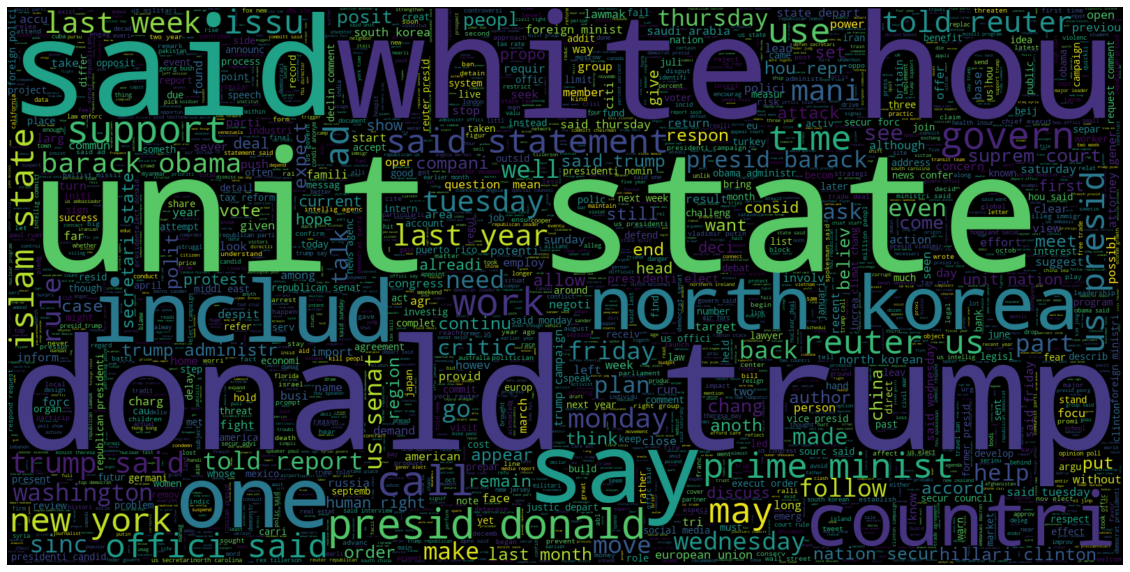

In [0]:
plt.figure(figsize=(20,18))
plot_wordcloud(" ".join(true_text.text))

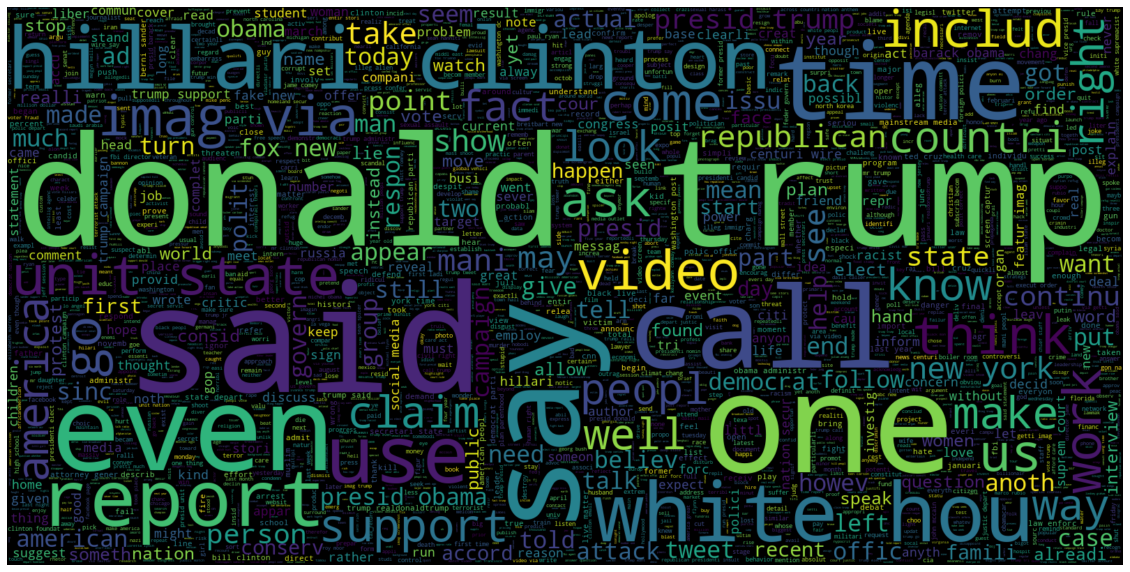

In [0]:
plt.figure(figsize=(20,18))
plot_wordcloud(" ".join(fake_words.text))

In [0]:
# Function to retrieve processed words

def final(X_data_full):
    
    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
    # function for tokenizing
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words
    
    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)
        
    # function for lemmatizing
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [0]:
# Preparing training and testing data using train_test_split

# Data preparation

import nltk
nltk.download('wordnet')

X_data = df['text']
y_data = df.type
X_data = X_data.astype(str)

x_data=final(X_data)

NBX_train, NBX_test, NBy_train, NBy_test = train_test_split(x_data, y_data, test_size=0.3, random_state= seed)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(NBX_train, NBy_train)
NB_predictions = MNB.predict(NBX_test)

In [0]:
# Model evaluation

print("Classification Report", "\n" ,classification_report(NBy_test, NB_predictions))
print("Confusion Matrix", "\n" ,confusion_matrix(NBy_test, NB_predictions))

MNB_f1 = round(f1_score(NBy_test, NB_predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(NBy_test, NB_predictions)*100),2)

print("\n","NB Evaluation:","\n","Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7057
           1       0.92      0.92      0.92      6413

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470

Confusion Matrix 
 [[6568  489]
 [ 507 5906]]

 NB Evaluation: 
 Accuracy :  92.61  %
f1_score :  0.926


In [0]:
# Instatiation, fitting and prediction

RFX_train, RFX_test, RFy_train, RFy_test = train_test_split(x_data, y_data, test_size=0.3, random_state= seed)

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(RFX_train, RFy_train)
RF_predictions = rfc.predict(RFX_test)

In [0]:
# Model evaluation

print("Classification Report", "\n" , classification_report(RFy_test, RF_predictions))
print("Confusion Matrix", "\n" ,confusion_matrix(RFy_test, RF_predictions))

rfc_f1 = round(f1_score(RFy_test, RF_predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(RFy_test, RF_predictions) * 100), 2)

print("\n","RF Evaluation:","\n","Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7057
           1       1.00      0.99      0.99      6413

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Confusion Matrix 
 [[7027   30]
 [  75 6338]]

 RF Evaluation: 
 Accuracy :  99.22  %
f1_score :  0.992


In [0]:
import pickle
import requests
import json
# Saving model to disk
pickle.dump(rfc, open('/content/drive/My Drive/Data Science/model.pkl','wb'))

ValueError: ignored